In [1]:
from matplotlib import pyplot
from matplotlib.widgets import Slider
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
X = np.zeros((2091,32256))

In [3]:
for j in range (1,40):
    if(j!=14):
        if(j<10):
            path = "/Users/mundogn/Documents/Estadistica-III-Proy1/CroppedYale_3/yaleB0"+str(j)+"/"
        else:
            path = "/Users/mundogn/Documents/Estadistica-III-Proy1/CroppedYale_3/yaleB"+str(j)+"/"
        for i in range(1,56):
            im = Image.open(path+str(i)+".pgm")
            aux = np.asarray(im.getdata())
            aux = np.transpose(aux)
            if(j<14):
                X[(j-1)*55+i-1] = aux
            else:
                X[(j-2)*55+i-1] = aux

In [4]:
X_hat = X.mean(axis=0)
len(X_hat)
X = X - X_hat

In [5]:
pca = PCA(n_components = 20)
principalComponents = pca.fit_transform(X)

<IPython.core.display.Javascript object>


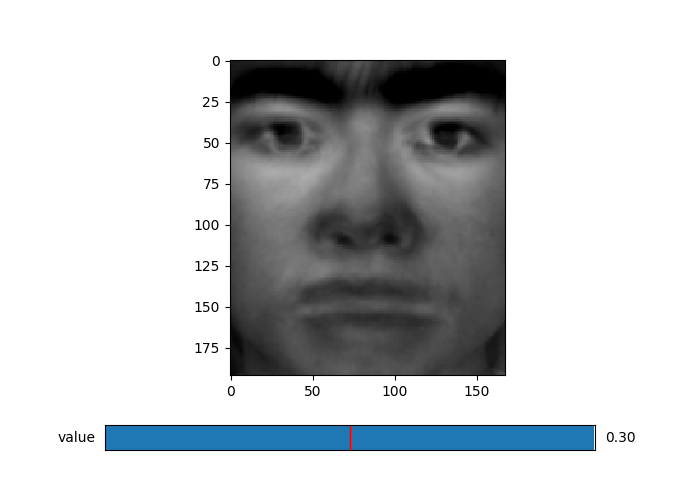

In [10]:
%matplotlib notebook

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
plt.subplots_adjust(left=0.15, bottom=0.25)   

data_start = 0
dataSlider_ax  = fig.add_axes([0.15, 0.1, 0.7, 0.05])
dataSlider = Slider(dataSlider_ax, 'value', -.3, .3, valinit=data_start)

im.putdata(X_hat)
image = ax.imshow(im)

def update(val):
    global image
    ref = dataSlider.val    
    print (ref)
    im.putdata(X_hat+ref*25500*pca.components_[4,:])
    image = ax.imshow(im)

dataSlider.on_changed(update)    
pyplot.show()